**Loading and Exploring the Data**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [6]:
diabetes = load_diabetes()

In [7]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [8]:
df['target']=diabetes.target

**Exploratory Data Analysis**

In [10]:
##data types and basic info
print(df.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [11]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [12]:
#quality and missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

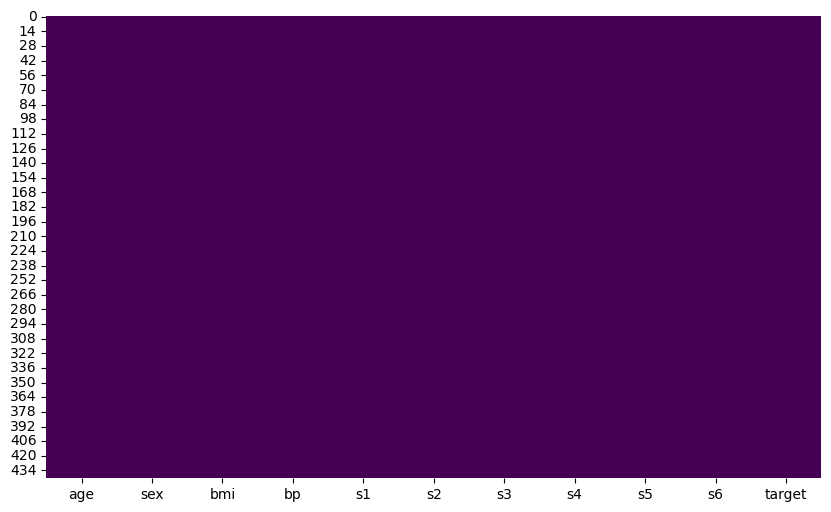

In [13]:
##visualizate missing data 
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False,cmap='viridis')
plt.show()

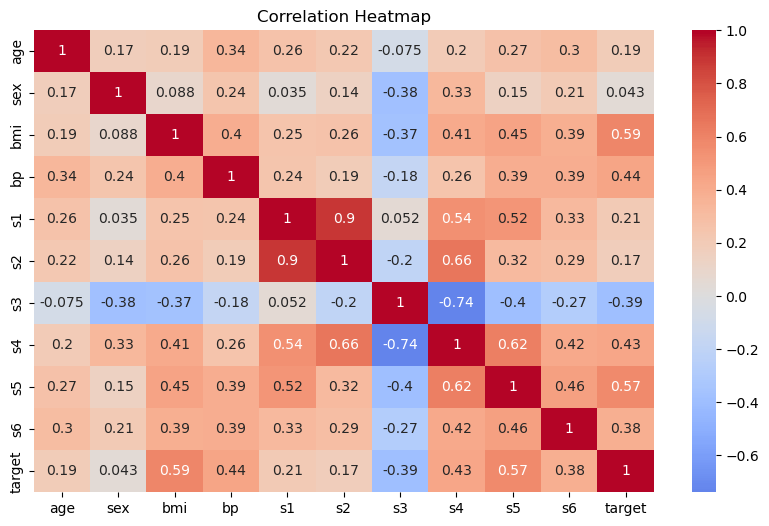

In [14]:
#correlation analysis
corr_matrix=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

**Data Distribution visualization**

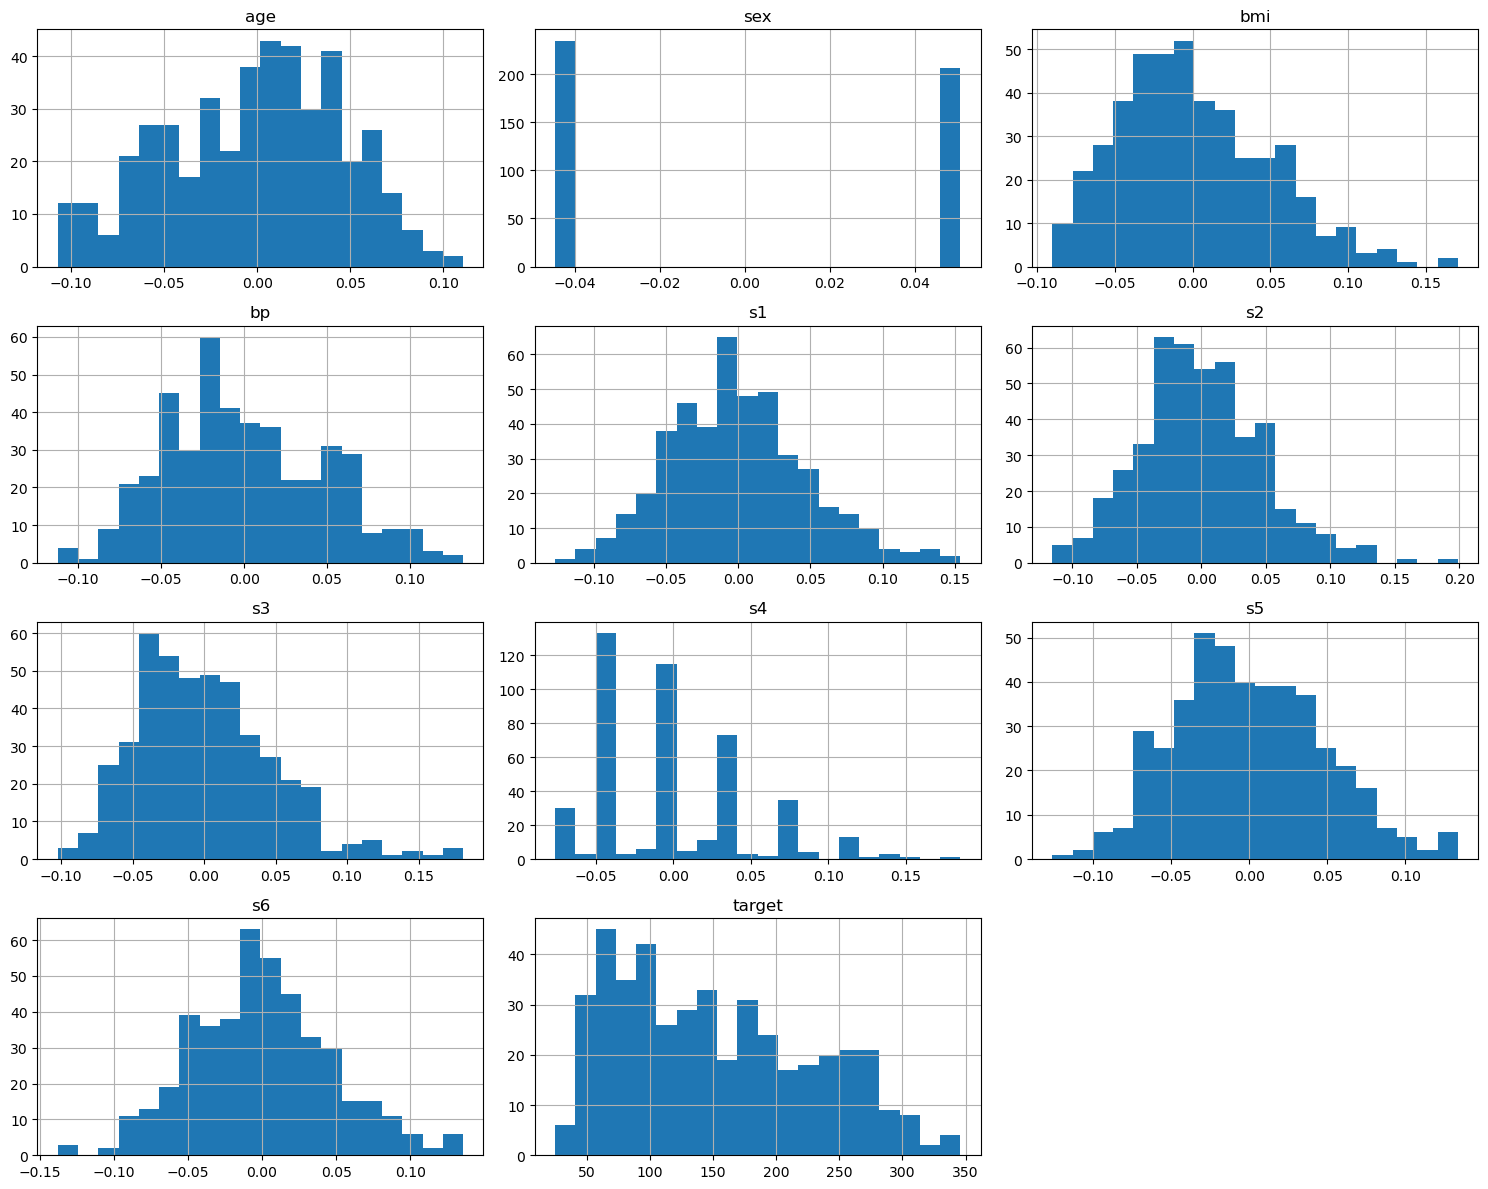

In [28]:
#data distribution visualization
df.hist(figsize=(15,12), bins=20)
plt.tight_layout()
plt.show()

C:\Users\ShePlay\AppData\Local\Temp\ipykernel_13644\1977359157.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
C:\Users\ShePlay\AppData\Local\Temp\ipykernel_13644\1977359157.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
C:\Users\ShePlay\AppData\Local\Temp\ipykernel_13644\1977359157.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
C:\Users\ShePlay\AppData\Local\Temp\ipykernel_13644\1977359157.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your co

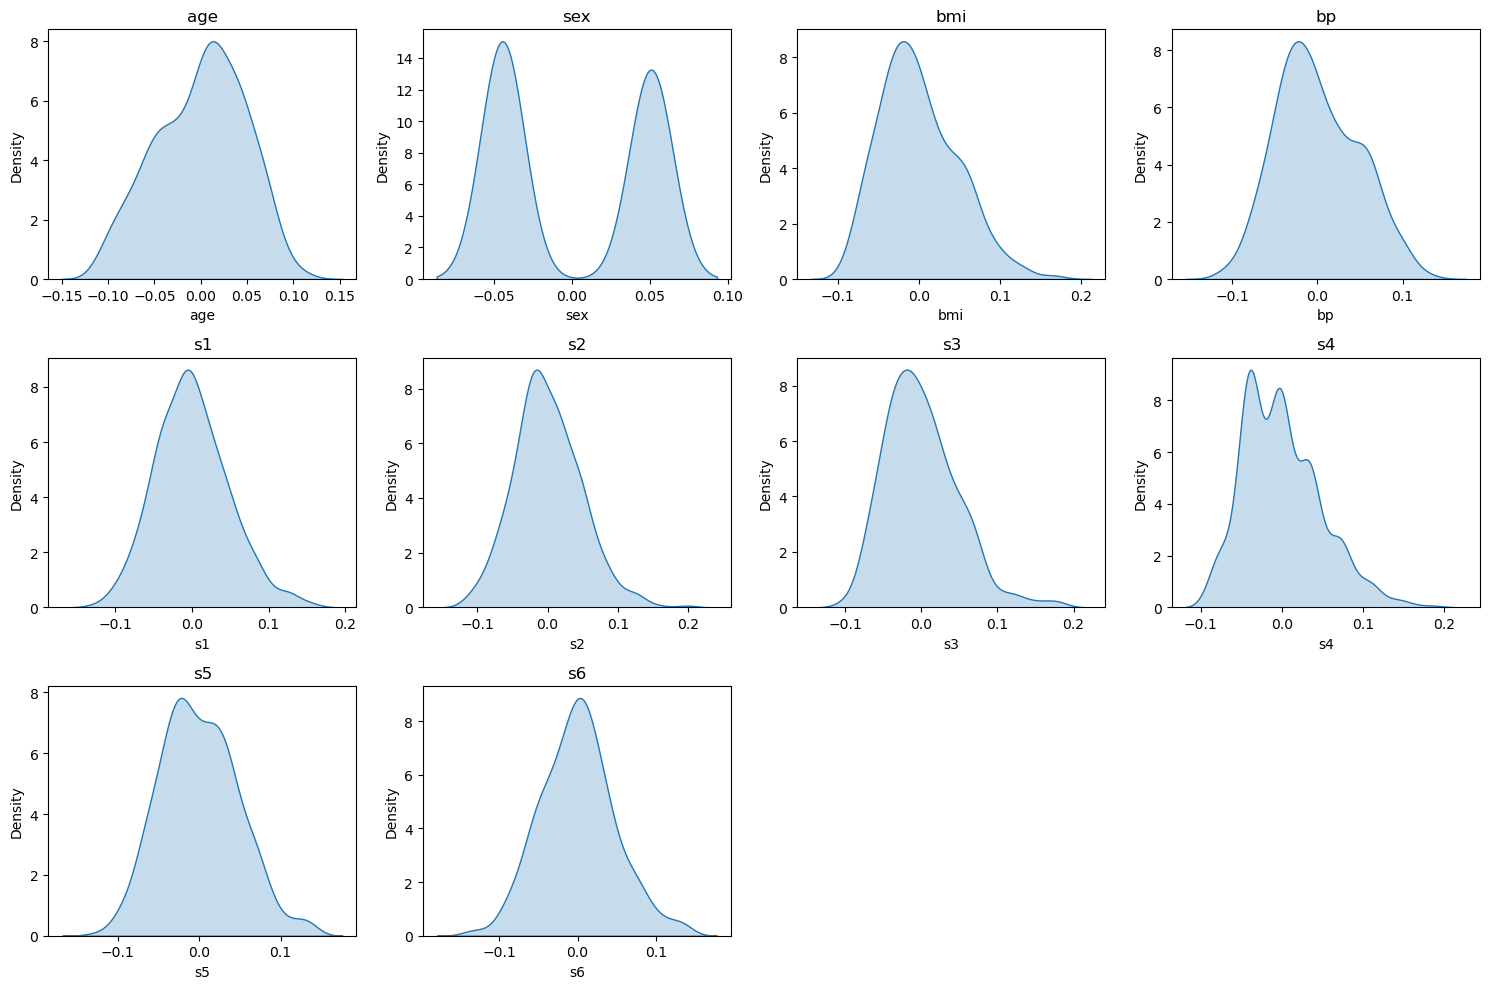

In [32]:
#KDE plots for selected features
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3,4,i+1)
    sns.kdeplot(df[col], shade=True)
    plt.title(col)
plt.tight_layout()
plt.show()

**Outlier detection**

In [42]:
type(df)

pandas.core.frame.DataFrame

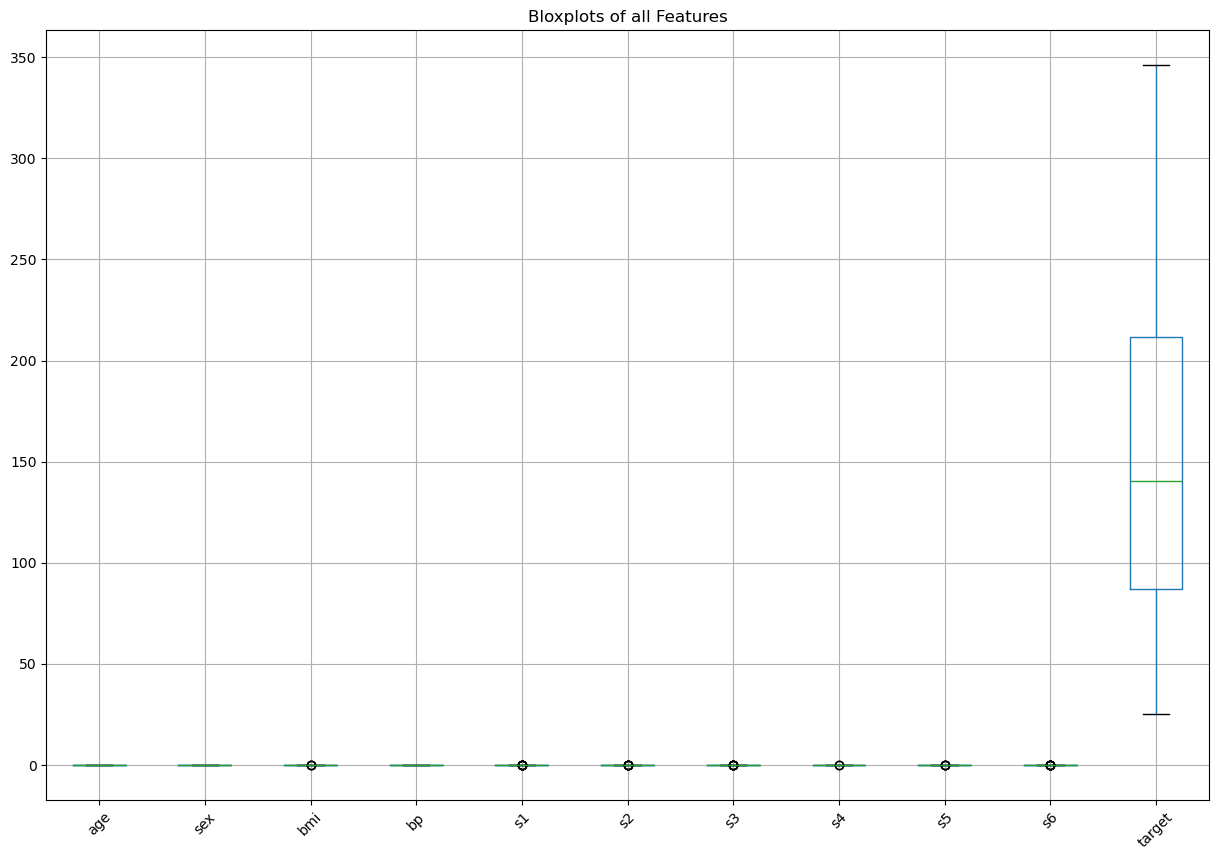

In [44]:
#bloxplots for all features
type(df)
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Bloxplots of all Features")
plt.show()

ValueError: num must be an integer with 1 <= num <= 4, not 5

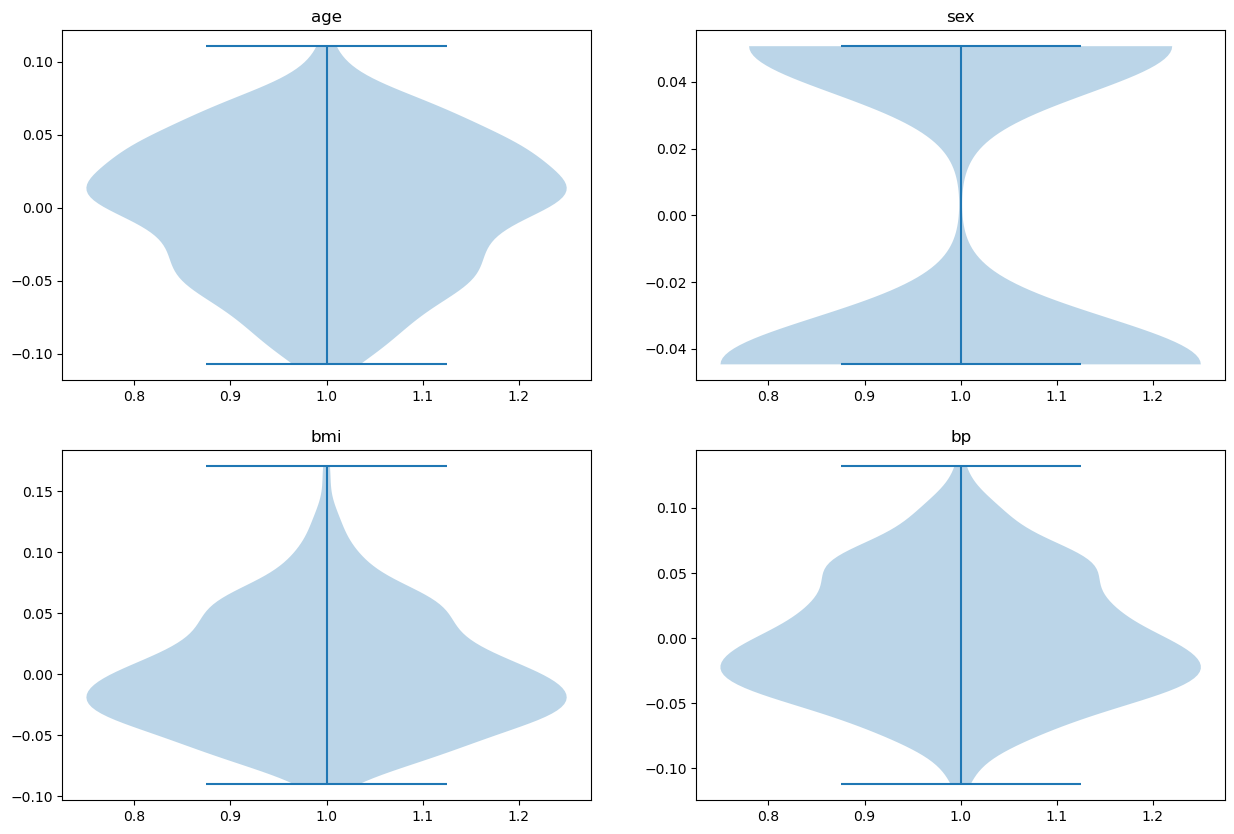

In [52]:
#violin plots for selected features
plt.figure(figsize=(15,10))
for i, col in  enumerate(df.columns[:-1]):
    plt.subplot(2,2,i+1)
    plt.violinplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**feature engineering**

In [56]:
# Create interaction terms
df['bmi_age'] = df['bmi'] * df['age']
df['bp_glucose'] = df['bp'] * df['s1']  # s1 is glucose

**feature reduction with pca**

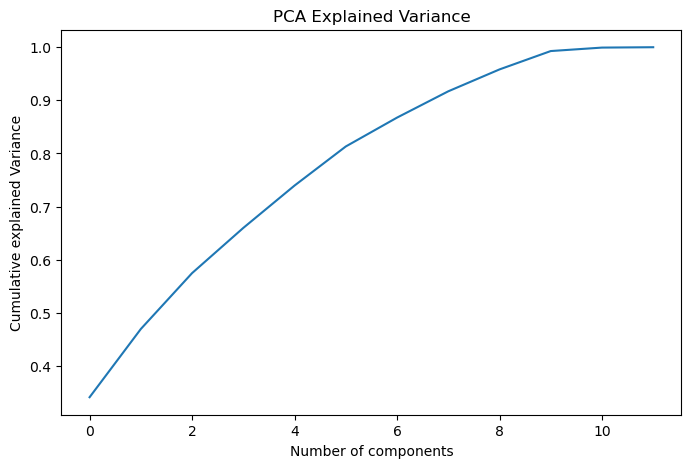

AttributeError: 'numpy.ndarray' object has no attribute 'fit_transform'

In [68]:
#separate features and target
X = df.drop('target', axis=1)
y = df['target']

#Standarize features and target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#plot explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained Variance')
plt.title('PCA Explained Variance')
plt.show()

#lets keep components explaining 95% variance
pca = PCA(n_components=0.95)
X_pca.fit_transform(X_scaled)
print(f"Reduced from {X.shape[1]} to {pca.n_components_} components")




**preprocessing data**

In [70]:
# We already scaled for PCA, but let's do it again for the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
print(f"Original features: {X_scaled.shape[1]}, Polynomial features: {X_poly.shape[1]}")

Original features: 12, Polynomial features: 90


**Data Visualization for Stakeholders**

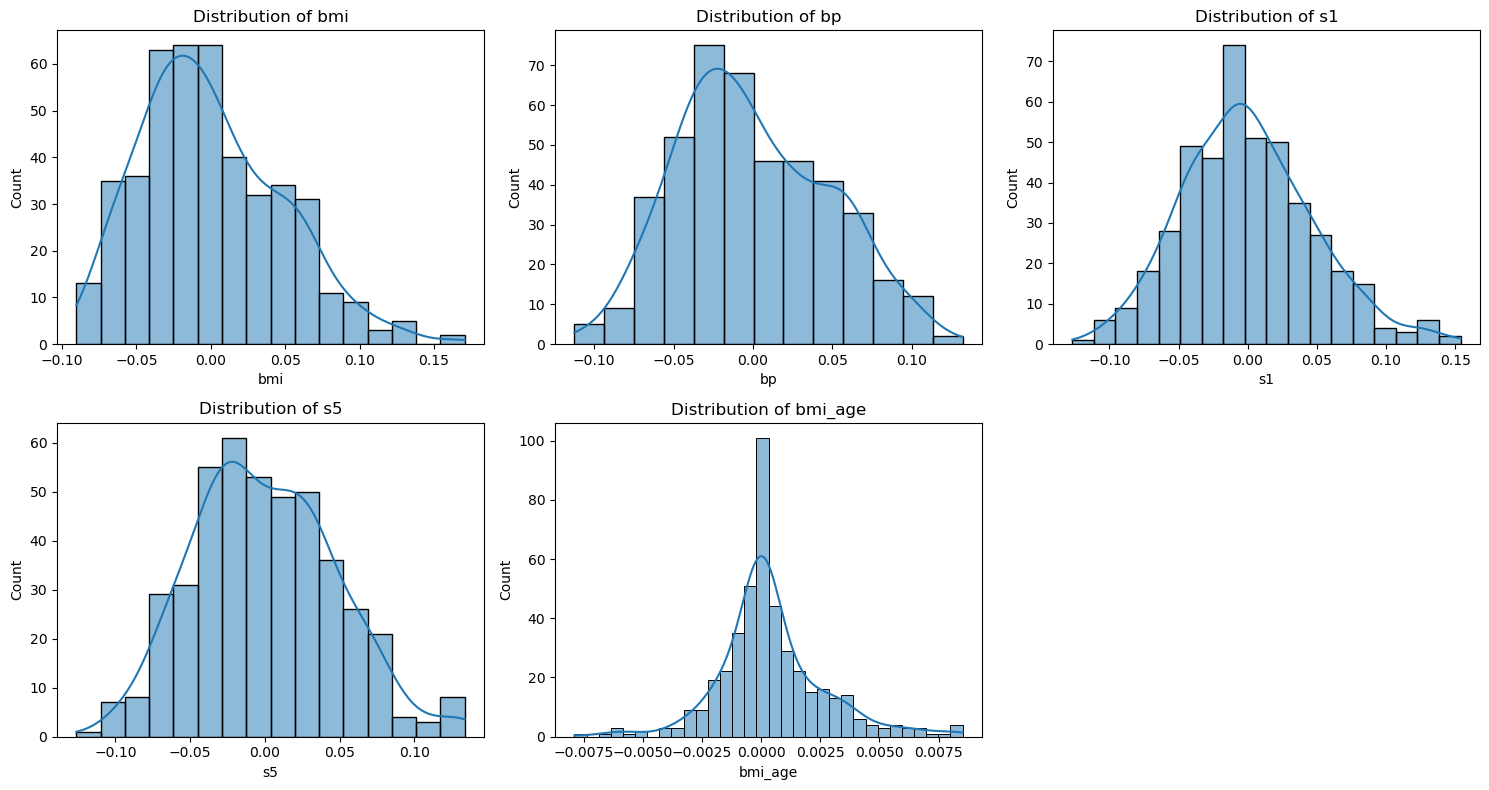

In [74]:
# Selected important features
important_features = ['bmi', 'bp', 's1', 's5', 'bmi_age']
plt.figure(figsize=(15, 8))
for i, col in enumerate(important_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

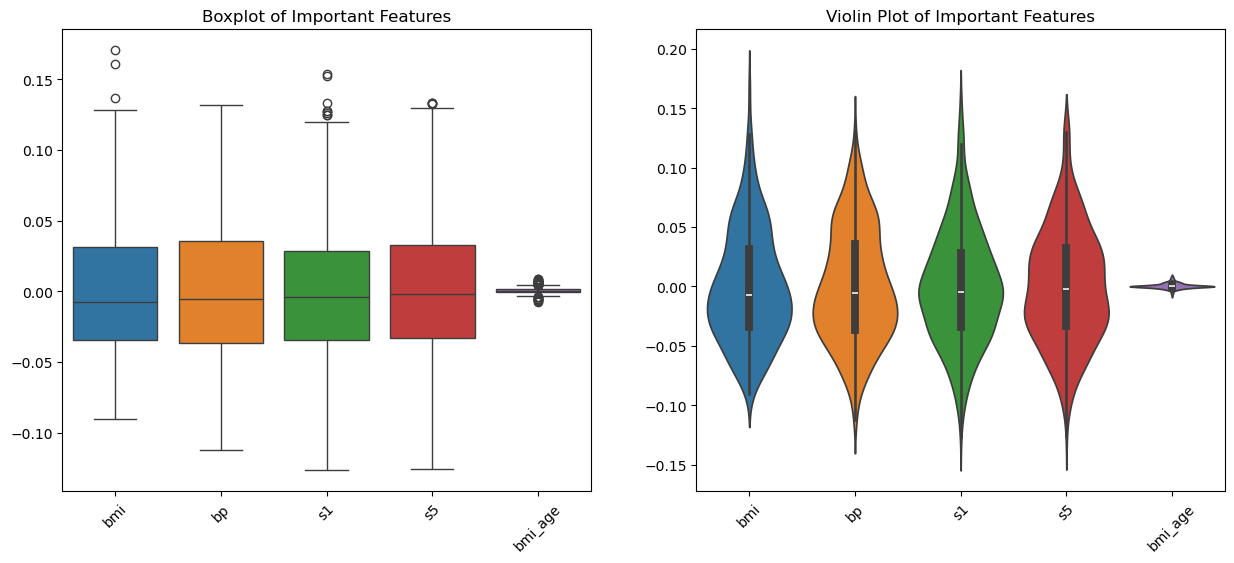

In [76]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[important_features])
plt.title("Boxplot of Important Features")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.violinplot(data=df[important_features])
plt.title("Violin Plot of Important Features")
plt.xticks(rotation=45)
plt.show()

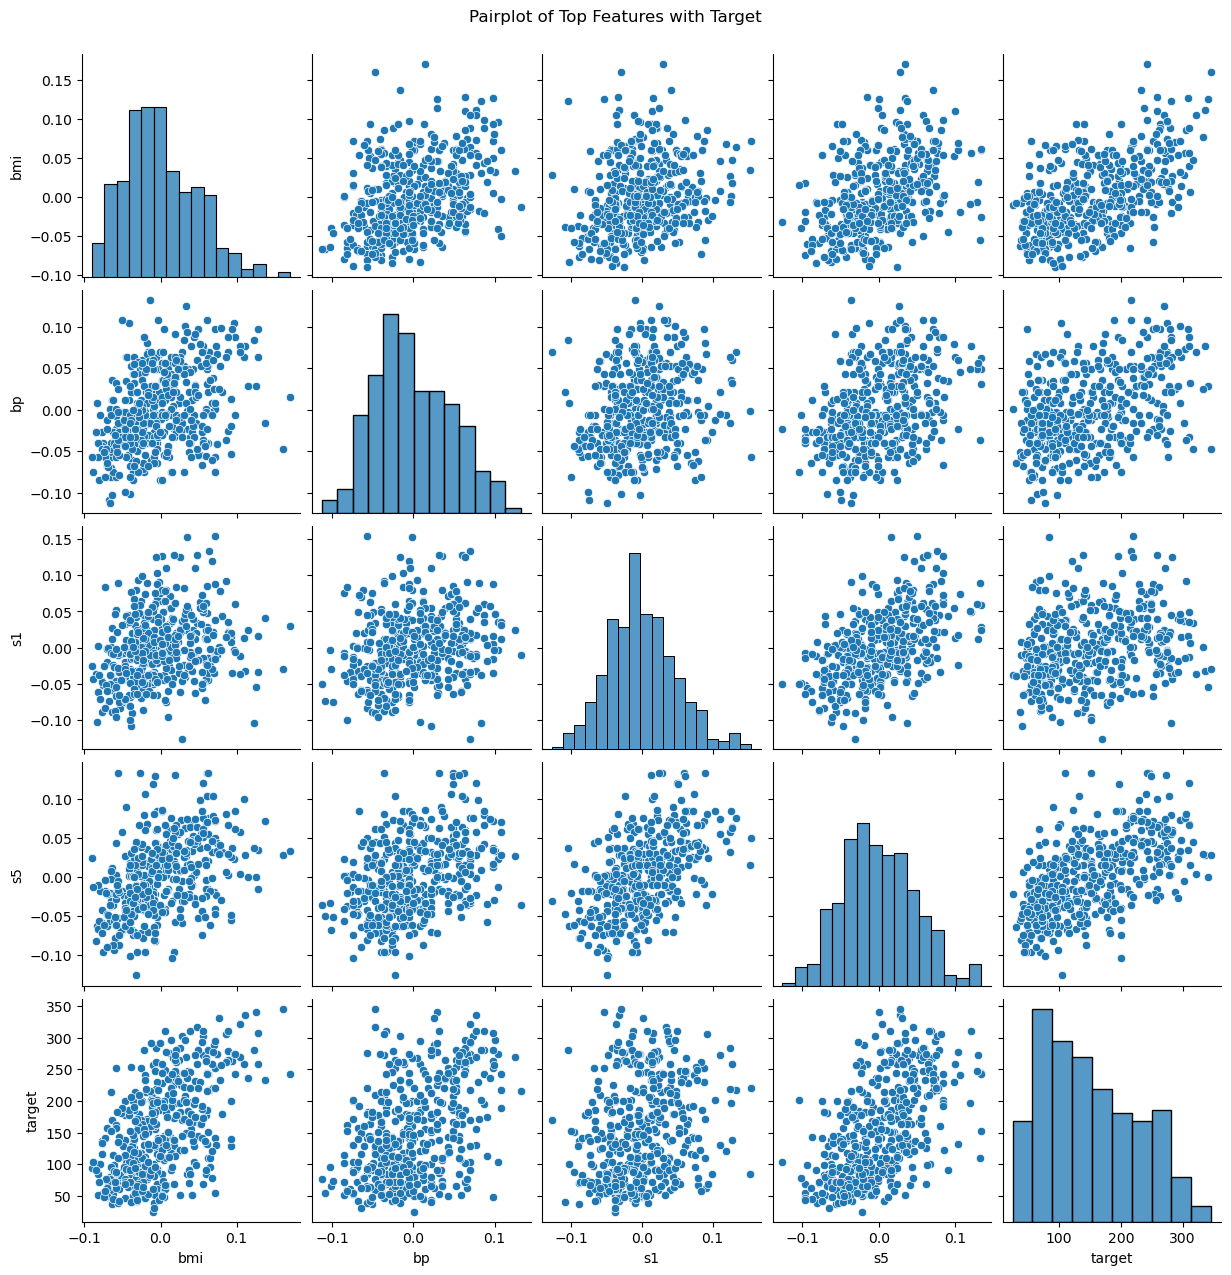

In [78]:
# Pairplot for top correlated features
top_features = ['bmi', 'bp', 's1', 's5', 'target']
sns.pairplot(df[top_features])
plt.suptitle("Pairplot of Top Features with Target", y=1.02)
plt.show()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [84]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 42.16
MSE: 2830.52
RMSE: 53.20
R²: 0.47


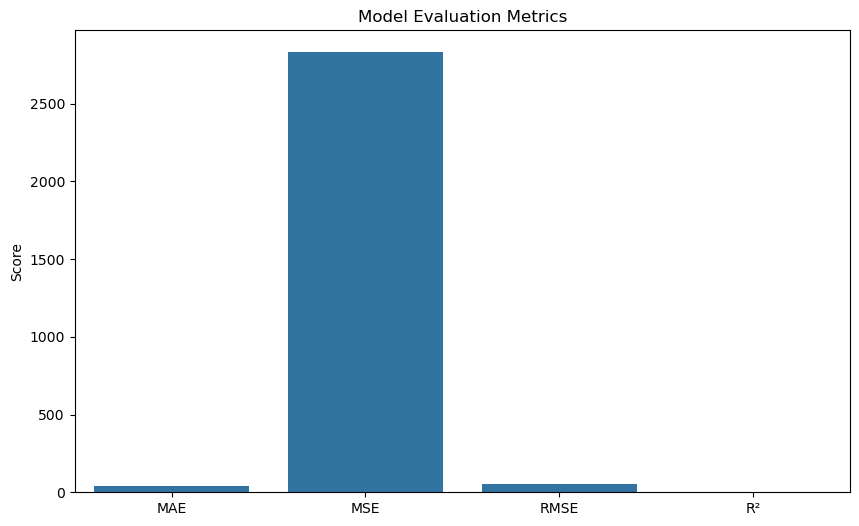

In [86]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae, mse, rmse, r2]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.show()

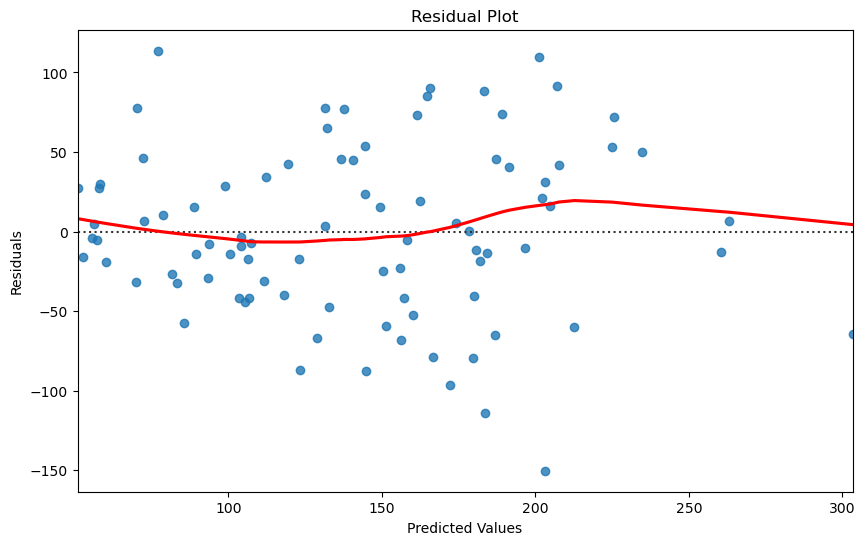

In [88]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

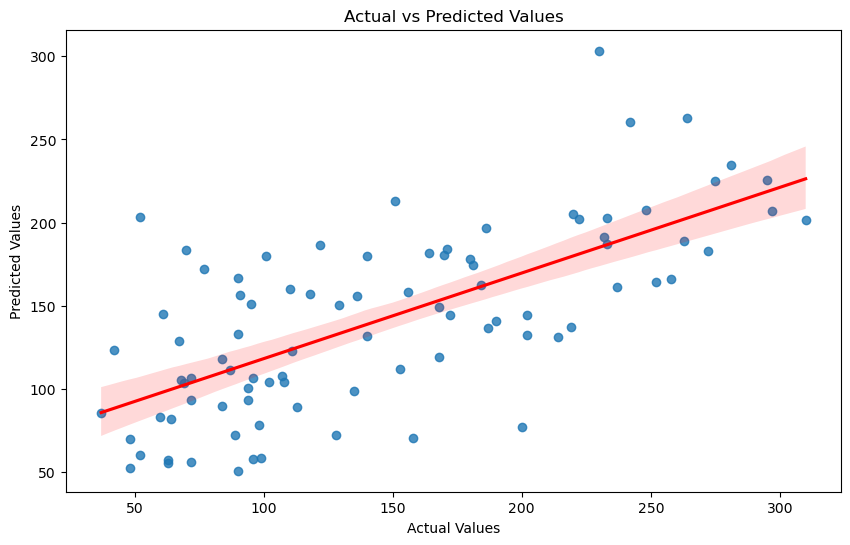

In [90]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'red'})
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

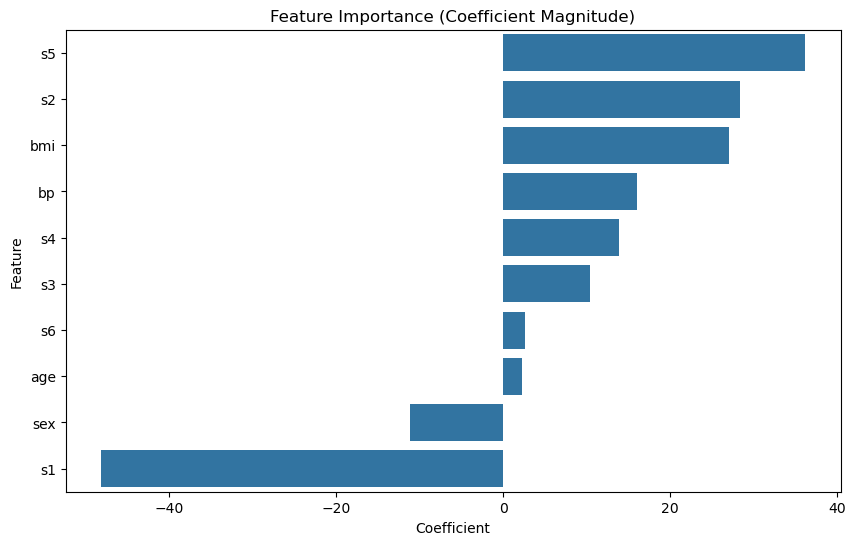

In [92]:
# Get coefficients
coefficients = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Coefficient': model.coef_[:len(diabetes.feature_names)]  # Exclude interaction terms
}).sort_values('Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Importance (Coefficient Magnitude)")
plt.show()